# Practice Lab: Linear Regression

Welcome to your first practice lab! In this lab, you will implement linear regression with one variable to predict profits for a restaurant franchise.


# Outline
- [ 1 - Packages ](#1)
- [ 2 - Linear regression with one variable ](#2)
  - [ 2.1 Problem Statement](#2.1)
  - [ 2.2  Dataset](#2.2)
  - [ 2.3 Refresher on linear regression](#2.3)
  - [ 2.4  Compute Cost](#2.4)
    - [ Exercise 1](#ex01)
  - [ 2.5 Gradient descent ](#2.5)
    - [ Exercise 2](#ex02)
  - [ 2.6 Learning parameters using batch gradient descent ](#2.6)


_**NOTE:** To prevent errors from the autograder, you are not allowed to edit or delete non-graded cells in this notebook . Please also refrain from adding any new cells. 
**Once you have passed this assignment** and want to experiment with any of the non-graded code, you may follow the instructions at the bottom of this notebook._

<a name="1"></a>
## 1 - Packages 

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for working with matrices in Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- ``utils.py`` contains helper functions for this assignment. You do not need to modify code in this file.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

## 2 -  Problem Statement

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.
- You would like to expand your business to cities that may give your restaurant higher profits.
- The chain already has restaurants in various cities and you have data for profits and populations from the cities.
- You also have data on cities that are candidates for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

## 3 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `x_train` and `y_train`
  - `x_train` is the population of a city
  - `y_train` is the profit of a restaurant in that city. A negative value for profit indicates a loss.   
  - Both `X_train` and `y_train` are numpy arrays.

In [3]:
# load the dataset
x_train, y_train = load_data()

#### View the variables
Before starting on any task, it is useful to get more familiar with your dataset.  
- A good place to start is to just print out each variable and see what it contains.

The code below prints the variable `x_train` and the type of the variable.

In [6]:
# print x_train
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]


`x_train` is a numpy array that contains decimal values that are all greater than zero.
- These values represent the city population times 10,000
- For example, 6.1101 means that the population for that city is 61,101
  
Now, let's print `y_train`

In [5]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


Similarly, `y_train` is a numpy array that has decimal values, some negative, some positive.
- These represent your restaurant's average monthly profits in each city, in units of \$10,000.
  - For example, 17.592 represents \$175,920 in average monthly profits for that city.
  - -2.6807 represents -\$26,807 in average monthly loss for that city.

#### Check the dimensions of your variables

Another useful way to get familiar with your data is to view its dimensions.

Please print the shape of `x_train` and `y_train` and see how many training examples you have in your dataset.

In [7]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


The city population array has 97 data points, and the monthly average profits also has 97 data points. These are NumPy 1D arrays.

#### Visualize your data

It is often useful to understand the data by visualizing it. 
- For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). 
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales).When you have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.


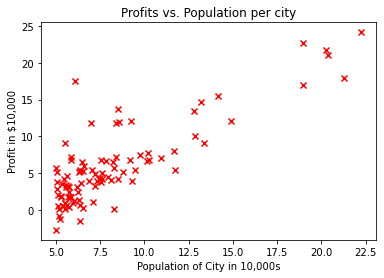

In [8]:
# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

Your goal is to build a linear regression model to fit this data.
- With this model, you can then input a new city's population, and have the model estimate your restaurant's potential monthly profits for that city.

<a name="4"></a>
## 4 - Refresher on linear regression

In this practice lab, you will fit the linear regression parameters $(w,b)$ to your dataset.
- The model function for linear regression, which is a function that maps from `x` (city population) to `y` (your restaurant's monthly profit for that city) is represented as 
    $$f_{w,b}(x) = wx + b$$
    

- To train a linear regression model, you want to find the best $(w,b)$ parameters that fit your dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, you can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits your data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, you can use a method called **gradient descent**. 
  - With each step of gradient descent, your parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.
  

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).

<a name="5"></a>
## 5 - Compute Cost

Gradient descent involves repeated steps to adjust the value of your parameter $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it will be helpful for you to monitor your progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 
- In this section, you will implement a function to calculate $J(w,b)$ so that you can check the progress of your gradient descent implementation.

#### Cost function
As you may recall from the lecture, for one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- You can think of $f_{w,b}(x^{(i)})$ as the model's prediction of your restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

Please complete the `compute_cost()` function below to compute the cost $J(w,b)$.

<a name="ex01"></a>
### Exercise 1

Complete the `compute_cost` below to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The cost for that example  $$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$
    

* Return the total cost over all examples
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [17]:
# UNQ_C1
# GRADED FUNCTION: compute_cost

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###
    fwb = np.dot(w,x)+b
    cost = (fwb-y)**2
    total_cost = (1/(2*m))*np.sum(cost)
    print(cost.shape)
    print(cost)
    print("wdw")
    ### END CODE HERE ### 

    return total_cost

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
    
   * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
    
    ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
    ```
  
   * In this case, you can iterate over all the examples in `x` using a for loop and add the `cost` from each iteration to a variable (`cost_sum`) initialized outside the loop.

   * Then, you can return the `total_cost` as `cost_sum` divided by `2m`.
   * If you are new to Python, please check that your code is properly indented with consistent spaces or tabs. Otherwise, it might produce a different output or raise an `IndentationError: unexpected indent` error. You can refer to [this topic](https://community.deeplearning.ai/t/indentation-in-python-indentationerror-unexpected-indent/159398) in our community for details.

    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    
    ```python 
    def compute_cost(x, y, w, b):
        # number of training examples
        m = x.shape[0] 
    
        # You need to return this variable correctly
        total_cost = 0
    
        ### START CODE HERE ###  
        # Variable to keep track of sum of cost from each example
        cost_sum = 0
    
        # Loop over training examples
        for i in range(m):
            # Your code here to get the prediction f_wb for the ith example
            f_wb = 
            # Your code here to get the cost associated with the ith example
            cost = 
        
            # Add to sum of cost for each example
            cost_sum = cost_sum + cost 

        # Get the total cost as the sum divided by (2*m)
        total_cost = (1 / (2 * m)) * cost_sum
        ### END CODE HERE ### 

        return total_cost
    ```
    
    * If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; For scalars $a$, $b$ and $c$ (<code>x[i]</code>, <code>w</code> and <code>b</code> are all scalars), you can calculate the equation $h = ab + c$ in code as <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>

     <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate cost</b></font></summary>
          &emsp; &emsp; You can calculate the square of a variable z as z**2
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate cost</b></font></summary>
              &emsp; &emsp; You can compute cost as <code>cost = (f_wb - y[i]) ** 2</code>
          </details>
    </details>
        
    </details>

</details>

    


You can check if your implementation was correct by running the following test code:

In [18]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

(97,)
[ 19.11263524   8.55679504  19.14237504   9.93762576  34.76635369
  34.57204804 134.66442025  37.89879844  54.37145169  53.18201476
  84.07422864 191.075329    86.73010641 112.169281   133.75431365
  67.99486681  70.997476   114.47780232 104.19101476  95.10735529
 104.84940816 390.971529    59.55517584  71.65114609  81.85363729
 264.127504   173.054025   251.77120929 160.2756     451.945081
 161.92053504  66.94839684  54.20493376 119.55454281 118.36569616
 151.40072025 170.96608516  77.78887204 274.068025    67.39424836
 126.72522727 117.79846225 362.16373636 102.14740624  98.35878976
 199.93677201  36.08044489 115.75177744 268.81897849 122.44086409
  87.0489      95.56626564 133.61741649 125.62150561 149.87390929
 229.18629321 122.60689984  58.90869504 245.172964   210.04994761
 181.74814596 146.44363993 656.845641   352.012644   478.034496
 111.32782144 140.327716   187.59685156 120.59334225 428.0761
 212.92938241 135.56177761 137.686756   146.66905449 188.63649025
 190.4129529

**Expected Output**:
<table>
  <tr>
    <td> <b>Cost at initial w:<b> 75.203 </td> 
  </tr>
</table>

<a name="6"></a>
## 6 - Gradient descent 

In this section, you will implement the gradient for parameters $w, b$ for linear regression. 

As described in the lecture videos, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

<a name="ex02"></a>
### Exercise 2

Please complete the `compute_gradient` function to:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$
   
    * The gradient for the parameters $w, b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$
        $$
        \frac{\partial J(w,b)}{\partial w}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
        $$
    

* Return the total gradient update from all the examples
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} \frac{\partial J(w,b)}{\partial w}^{(i)} 
    $$
  * Here, $m$ is the number of training examples and $\sum$ is the summation operator

If you get stuck, you can check out the hints presented after the cell below to help you with the implementation.

In [19]:
# UNQ_C2
# GRADED FUNCTION: compute_gradient
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ###
    fwb = np.dot(w,x)+b
    dj_dw = (1/m)*np.dot(fwb-y,x)
    dj_db = (1/m)*np.sum(fwb-y)
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

<details>
  <summary><font size="3" color="darkgreen"><b>Click for hints</b></font></summary>
    
   * You can represent a summation operator eg: $h = \sum\limits_{i = 0}^{m-1} 2i$ in code as follows:
    
   ```python 
    h = 0
    for i in range(m):
        h = h + 2*i
   ```
    
   * In this case, you can iterate over all the examples in `x` using a for loop and for each example, keep adding the gradient from that example to the variables `dj_dw` and `dj_db` which are initialized outside the loop. 

   * Then, you can return `dj_dw` and `dj_db` both divided by `m`.    
    <details>
          <summary><font size="2" color="darkblue"><b> Click for more hints</b></font></summary>
        
    * Here's how you can structure the overall implementation for this function
    
    ```python 
    def compute_gradient(x, y, w, b): 
        """
        Computes the gradient for linear regression 
        Args:
          x (ndarray): Shape (m,) Input to the model (Population of cities) 
          y (ndarray): Shape (m,) Label (Actual profits for the cities)
          w, b (scalar): Parameters of the model  
        Returns
          dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
          dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
        """
    
        # Number of training examples
        m = x.shape[0]
    
        # You need to return the following variables correctly
        dj_dw = 0
        dj_db = 0
    
        ### START CODE HERE ### 
        # Loop over examples
        for i in range(m):  
            # Your code here to get prediction f_wb for the ith example
            f_wb = 
            
            # Your code here to get the gradient for w from the ith example 
            dj_dw_i = 
        
            # Your code here to get the gradient for b from the ith example 
            dj_db_i = 
     
            # Update dj_db : In Python, a += 1  is the same as a = a + 1
            dj_db += dj_db_i
        
            # Update dj_dw
            dj_dw += dj_dw_i
    
        # Divide both dj_dw and dj_db by m
        dj_dw = dj_dw / m
        dj_db = dj_db / m
        ### END CODE HERE ### 
        
        return dj_dw, dj_db
    ```
        
    * If you're still stuck, you can check the hints presented below to figure out how to calculate `f_wb` and `cost`.
    
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate f_wb</b></font></summary>
           &emsp; &emsp; You did this in the previous exercise! For scalars $a$, $b$ and $c$ (<code>x[i]</code>, <code>w</code> and <code>b</code> are all scalars), you can calculate the equation $h = ab + c$ in code as <code>h = a * b + c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute f_wb as <code>f_wb = w * x[i] + b </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_dw_i</b></font></summary>
           &emsp; &emsp; For scalars $a$, $b$ and $c$ (<code>f_wb</code>, <code>y[i]</code> and <code>x[i]</code> are all scalars), you can calculate the equation $h = (a - b)c$ in code as <code>h = (a-b)*c</code>
          <details>
              <summary><font size="2" color="blue"><b>&emsp; &emsp; More hints to calculate f</b></font></summary>
               &emsp; &emsp; You can compute dj_dw_i as <code>dj_dw_i = (f_wb - y[i]) * x[i] </code>
           </details>
    </details>
        
    <details>
          <summary><font size="2" color="darkblue"><b>Hint to calculate dj_db_i</b></font></summary>
             &emsp; &emsp; You can compute dj_db_i as <code> dj_db_i = f_wb - y[i] </code>
    </details>
        
    </details>

</details>

    


Run the cells below to check your implementation of the `compute_gradient` function with two different initializations of the parameters $w$,$b$.

In [20]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.3288497455567 -5.839135051546392
Using X with shape (4, 1)
All tests passed!


Now let's run the gradient descent algorithm implemented above on our dataset.

**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at initial , b (zeros)<b></td>
    <td> -65.32884975 -5.83913505154639</td> 
  </tr>
</table>

In [21]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.416101181144334 -4.007175051546392


**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

<a name="2.6"></a>
### 2.6 Learning parameters using batch gradient descent 

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.
- You don't need to implement anything for this part. Simply run the cells below. 

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step. 

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [22]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(x)
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

Now let's run the gradient descent algorithm above to learn the parameters for our dataset.

In [23]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

(97,)
[1.83384426e+02 2.98184344e+01 6.46175667e+01 5.21356007e+01
 8.62461047e+00 4.03371889e+01 3.53237032e-01 4.01656122e+01
 5.30357316e+00 2.08024118e-01 2.88289500e-01 3.83585798e+01
 4.21522440e-01 2.80327261e+00 9.16403537e+00 3.57502272e-03
 1.18367012e+00 8.11712392e+00 3.68418740e-01 5.06426283e-01
 9.27483004e-01 7.16807893e+01 3.81910985e-01 9.92693965e-01
 3.73781237e-01 1.04102394e+02 2.56261098e+01 2.88230132e-02
 3.63112226e+01 9.18462350e+01 2.21814988e+01 2.66809168e+00
 3.64075385e+01 4.23510272e+00 1.25438089e+00 4.60892061e-01
 1.51523716e+00 1.07664476e-01 2.79892062e+00 1.65998876e+00
 9.20568348e+00 4.13641195e-01 5.39025875e+00 1.93121925e+00
 2.43866372e+00 1.32928201e+01 3.10818772e+00 4.01753614e+00
 9.14658582e-02 7.07961657e+00 3.11904818e+00 2.84344145e+00
 3.84201411e-01 7.45788337e-04 7.68529658e+00 3.17384357e+01
 2.82796031e+00 7.42109042e-01 4.74472043e+00 6.72760012e-01
 4.28401216e-01 1.75122034e+01 1.57552052e+01 5.09126753e+00
 2.12512889e+01 1.

 1.13904631e+01]
wdw
(97,)
[1.69203477e+02 2.56085719e+01 4.83060653e+01 4.20020242e+01
 6.05272254e+00 2.80277928e+01 2.08169502e+00 2.74125200e+01
 2.83010919e+00 2.71616208e-02 9.58760586e-01 1.44882889e+01
 1.20306993e+00 3.73813041e-01 1.19256135e+01 1.81311410e-01
 2.45126443e-01 9.97116833e+00 1.47527530e+00 1.89382665e-03
 2.29632068e+00 2.18515665e+01 5.13047499e-02 1.70171445e-01
 1.04054208e+00 4.51048571e+01 8.89539269e+00 3.30884507e+00
 1.49467755e+01 2.85907869e+01 2.54673675e+01 9.78180964e-01
 2.28269778e+01 6.46094703e+00 1.05039970e-02 2.66506453e+00
 4.93705369e+00 5.57024374e-01 1.66915039e-01 4.87626731e-01
 1.16037593e+01 1.83597581e+00 1.71704552e+01 3.40924742e+00
 4.00712363e-01 1.94147482e+01 2.15539821e+00 6.08847609e+00
 2.30358915e+00 9.38863164e+00 8.15289341e-01 4.14435959e+00
 2.12061091e+00 8.18897333e-01 1.12734783e+01 3.87513187e+01
 5.07842141e+00 1.89708328e-01 1.18929076e+01 4.50960488e+00
 3.28826605e+00 2.02926544e+01 2.99669486e-03 9.11253055e-

 9.86914803e+00]
wdw
(97,)
[1.74401863e+02 2.79718521e+01 4.93409674e+01 4.39984081e+01
 7.13662749e+00 2.88926111e+01 1.72919030e+00 2.81608878e+01
 3.46405280e+00 1.74360635e-01 5.77984420e-01 1.28821350e+01
 7.72882049e-01 4.77679519e-01 1.04382409e+01 3.60260502e-02
 4.62723826e-01 8.46142745e+00 1.06664581e+00 1.10727724e-02
 1.74538705e+00 1.71593914e+01 2.08662764e-01 3.59617828e-01
 6.29860889e-01 3.90899156e+01 8.03301170e+00 3.49974088e+00
 1.36892278e+01 2.22325375e+01 2.30781006e+01 1.35166245e+00
 2.31762913e+01 5.43949065e+00 3.70210131e-02 2.33556969e+00
 4.52024075e+00 2.72530477e-01 3.10497193e-01 7.81557516e-01
 1.00606090e+01 1.43166597e+00 1.79284818e+01 2.65936010e+00
 5.51858128e-01 1.81358618e+01 2.95867511e+00 5.07714664e+00
 2.58509875e+00 8.04546856e+00 1.05568154e+00 3.22586628e+00
 1.75748619e+00 6.14098625e-01 1.00538629e+01 3.64765844e+01
 4.25883652e+00 4.33132848e-01 1.16648927e+01 4.40060458e+00
 3.08047711e+00 1.81340781e+01 4.08283711e-01 3.10728891e-

 8.67420449e+00]
wdw
(97,)
[1.78834212e+02 3.00399254e+01 5.02197362e+01 4.57131006e+01
 8.11717926e+00 2.96300326e+01 1.45805217e+00 2.87980125e+01
 4.04670298e+00 3.97046066e-01 3.31966043e-01 1.16044930e+01
 4.84499497e-01 5.74867538e-01 9.26412186e+00 7.49099004e-05
 6.98768694e-01 7.28772048e+00 7.74197238e-01 5.30433589e-02
 1.34049379e+00 1.36520449e+01 4.23090621e-01 5.73158223e-01
 3.63880103e-01 3.43648223e+01 7.34183856e+00 3.66441428e+00
 1.26744876e+01 1.75038458e+01 2.11599754e+01 1.71237752e+00
 2.34720921e+01 4.64850894e+00 7.18370084e-02 2.07531138e+00
 4.18395722e+00 1.11173913e-01 4.65456731e-01 1.08214875e+00
 8.84812001e+00 1.13054190e+00 1.85786012e+01 2.10075918e+00
 6.97642769e-01 1.70941338e+01 3.73244626e+00 4.29774060e+00
 2.83438617e+00 6.99618220e+00 1.28184147e+00 2.54242657e+00
 1.47850060e+00 4.64650049e-01 9.08228316e+00 3.46169492e+01
 3.62541649e+00 7.14525883e-01 1.14748568e+01 4.30997531e+00
 2.91099044e+00 1.64128013e+01 1.27749979e+00 5.96507623e-

 7.65865190e+00]
wdw
(97,)
[1.82895819e+02 3.19762534e+01 5.10221791e+01 4.72940831e+01
 9.05953536e+00 3.03058064e+01 1.23246483e+00 2.93810964e+01
 4.61336463e+00 6.76649169e-01 1.67663994e-01 1.05051046e+01
 2.81195060e-01 6.70633045e-01 8.26134264e+00 3.54820154e-02
 9.54337320e-01 6.30046537e+00 5.49716593e-01 1.18046421e-01
 1.01988431e+00 1.08216189e+01 6.81973927e-01 8.09269410e-01
 1.85588815e-01 3.03486179e+01 6.74278177e+00 3.81679695e+00
 1.17893201e+01 1.37090997e+01 1.94948445e+01 2.07578060e+00
 2.37415667e+01 3.98584199e+00 1.13229963e-01 1.85290007e+00
 3.89065592e+00 2.64482938e-02 6.32747385e-01 1.39644617e+00
 7.81732303e+00 8.88504069e-01 1.91772926e+01 1.65168109e+00
 8.44380212e-01 1.61774002e+01 4.51057800e+00 3.64796741e+00
 3.07002153e+00 6.10925076e+00 1.50555861e+00 1.99366086e+00
 1.24666097e+00 3.47269408e-01 8.24507562e+00 3.29749697e+01
 3.09581190e+00 1.02978345e+00 1.13041202e+01 4.22872140e+00
 2.76165256e+00 1.49281720e+01 2.48108793e+00 9.34982534e-

(97,)
[1.86859911e+02 3.39028318e+01 5.18028421e+01 4.88457627e+01
 1.00183087e+01 3.09653853e+01 1.03267060e+00 2.99495138e+01
 5.19559648e+00 1.01684364e+00 6.17764951e-02 9.49571101e+00
 1.37079661e-01 7.70074529e-01 7.34779389e+00 1.30935003e-01
 1.23875462e+00 5.41556250e+00 3.69386443e-01 2.05136810e-01
 7.51890041e-01 8.40086473e+00 9.90227749e-01 1.07573405e+00
 6.98819882e-02 2.67082882e+01 6.18866976e+00 3.96684256e+00
 1.09652250e+01 1.04851528e+01 1.79521507e+01 2.45973448e+00
 2.40031601e+01 3.39445938e+00 1.62083245e-01 1.65015285e+00
 3.61763034e+00 5.05756730e-06 8.18555470e-01 1.73780926e+00
 6.88279290e+00 6.82478810e-01 1.97642390e+01 1.26933432e+00
 9.99307562e-01 1.53164065e+01 5.33157489e+00 3.07120596e+00
 3.30641370e+00 5.31006620e+00 1.73858191e+00 1.52712462e+00
 1.04160091e+00 2.50140109e-01 7.47528135e+00 3.14277461e+01
 2.62421150e+00 1.38861263e+00 1.11405155e+01 4.15101731e+00
 2.62122091e+00 1.35617516e+01 4.01845574e+00 1.33357610e+00
 1.85563873e-01 4.

(97,)
[1.89851643e+02 3.53801606e+01 5.23904189e+01 5.00223227e+01
 1.07666890e+01 3.14631939e+01 8.94820627e-01 3.03780795e+01
 5.65353360e+00 1.31631962e+00 1.64426798e-02 8.77428985e+00
 6.27921393e-02 8.48917220e-01 6.69969483e+00 2.41634177e-01
 1.47561680e+00 4.79764974e+00 2.57897309e-01 2.85877651e-01
 5.78148708e-01 6.79084124e+00 1.25815844e+00 1.29970596e+00
 1.95715011e-02 2.41383110e+01 5.78987927e+00 4.08092218e+00
 1.03685537e+01 8.35654693e+00 1.68402163e+01 2.76809345e+00
 2.41996907e+01 2.98329267e+00 2.04320353e-01 1.50623163e+00
 3.41997723e+00 1.57574964e-02 9.73092096e-01 2.01741213e+00
 6.22289904e+00 5.46163365e-01 2.02088813e+01 1.01629372e+00
 1.12366850e+00 1.46880211e+01 5.99026155e+00 2.67236712e+00
 3.48889290e+00 4.74910265e+00 1.92376448e+00 1.21886514e+00
 9.00307753e-01 1.87903321e-01 6.92434792e+00 3.02951723e+01
 2.29704261e+00 1.69189077e+00 1.10189669e+01 4.09338851e+00
 2.51861390e+00 1.25829192e+01 5.40896639e+00 1.67772359e+00
 4.70731726e-01 1.

[1.92276622e+02 3.65919841e+01 5.28657029e+01 5.09793783e+01
 1.13885557e+01 3.18667095e+01 7.91048983e-01 3.07251971e+01
 6.03612207e+00 1.58536808e+00 9.85743229e-04 8.21439155e+00
 2.38031899e-02 9.15159325e-01 6.19983630e+00 3.55162991e-01
 1.68128122e+00 4.32753319e+00 1.82677864e-01 3.60565507e-01
 4.54876387e-01 5.61937544e+00 1.49705759e+00 1.49532758e+00
 1.57916007e-03 2.21644085e+01 5.47858027e+00 4.17390709e+00
 9.90047886e+00 6.81866461e+00 1.59711543e+01 3.02947910e+00
 2.43584391e+01 2.67165959e+00 2.41860275e-01 1.39517322e+00
 3.26493972e+00 5.05097205e-02 1.10716047e+00 2.25757468e+00
 5.71596729e+00 4.47475338e-01 2.05703183e+01 8.33056152e-01
 1.22904841e+00 1.41918599e+01 6.54822190e+00 2.37152265e+00
 3.63931022e+00 4.32037996e+00 2.07960263e+00 9.95991167e-01
 7.94072078e-01 1.44270176e-01 6.49627470e+00 2.93987793e+01
 2.04955307e+00 1.95770372e+00 1.09216297e+01 4.04730183e+00
 2.43752429e+00 1.18217857e+01 6.67780702e+00 1.98334868e+00
 7.94923370e-01 4.456572

(97,)
[1.94297323e+02 3.76114100e+01 5.32610911e+01 5.17791477e+01
 1.19169825e+01 3.22029611e+01 7.09919062e-01 3.10142703e+01
 6.36257532e+00 1.82720504e+00 2.38408585e-03 7.76450800e+00
 5.55020090e-03 9.71924221e-01 5.80039066e+00 4.65727812e-01
 1.86182907e+00 3.95640846e+00 1.30159141e-01 4.29000759e-01
 3.63929787e-01 4.73278524e+00 1.71069979e+00 1.66777891e+00
 1.86981944e-03 2.05928373e+01 5.22719065e+00 4.25173649e+00
 9.52087712e+00 5.66291271e+00 1.52685928e+01 3.25496216e+00
 2.44903519e+01 2.42649574e+00 2.75357865e-01 1.30638471e+00
 3.13921823e+00 9.42128082e-02 1.22478462e+00 2.46677156e+00
 5.31229577e+00 3.73156860e-01 2.08721877e+01 6.95033160e-01
 1.31993033e+00 1.37872576e+01 7.02929587e+00 2.13588274e+00
 3.76633218e+00 3.98055098e+00 2.21330774e+00 8.28374929e-01
 7.11108155e-01 1.12481123e-01 6.15196972e+00 2.86663327e+01
 1.85519535e+00 2.19260751e+00 1.08413149e+01 4.00931761e+00
 2.37134823e+00 1.12091870e+01 7.83018345e+00 2.25591102e+00
 1.12747322e+00 2.

 4.90381459e+00]
wdw
(97,)
[1.95821176e+02 3.83858824e+01 5.35588717e+01 5.23836140e+01
 1.23215395e+01 3.24565402e+01 6.51899601e-01 3.12321630e+01
 6.61328843e+00 2.02002454e+00 1.18918815e-02 7.43511138e+00
 2.13380291e-04 1.01565914e+00 5.50927168e+00 5.58557661e-01
 2.00341339e+00 3.68874113e+00 9.65690369e-02 4.84279217e-01
 3.02315882e-01 4.11722026e+00 1.88043843e+00 1.80341850e+00
 1.11373002e-02 1.94510503e+01 5.04235535e+00 4.31063438e+00
 9.24079116e+00 4.86577975e+00 1.47515731e+01 3.42954710e+00
 2.45896111e+01 2.25020611e+00 3.01931124e-01 1.24165040e+00
 3.04646277e+00 1.35899504e-01 1.31698458e+00 2.62990284e+00
 5.01897757e+00 3.21798739e-01 2.11002418e+01 5.99629976e-01
 1.39028406e+00 1.34873731e+01 7.40163564e+00 1.96709144e+00
 3.86311758e+00 3.73459160e+00 2.31641542e+00 7.12688601e-01
 6.51835431e-01 9.12138060e-02 5.89966456e+00 2.81225664e+01
 1.71565453e+00 2.37769007e+00 1.07812185e+01 3.98092105e+00
 2.32226920e+00 1.07600267e+01 8.75549955e+00 2.47204718e+

wdw
(97,)
[1.96987371e+02 3.89818531e+01 5.37865374e+01 5.28469790e+01
 1.26346212e+01 3.26506054e+01 6.09312269e-01 3.13988555e+01
 6.80775573e+00 2.17358169e+00 2.40187766e-02 7.18868984e+00
 9.65362454e-04 1.04966131e+00 5.29228227e+00 6.35022672e-01
 2.11488244e+00 3.49090082e+00 7.43144694e-02 5.28689378e-01
 2.59163142e-01 3.67656260e+00 2.01528840e+00 1.91043049e+00
 2.34217123e-02 1.86021332e+01 4.90362364e+00 4.35582626e+00
 9.02998918e+00 4.29845616e+00 1.43632442e+01 3.56576294e+00
 2.46654479e+01 2.12022393e+00 3.23020331e-01 1.19338523e+00
 2.97665608e+00 1.72811083e-01 1.38955133e+00 2.75782843e+00
 4.80087180e+00 2.85184182e-01 2.12750043e+01 5.31600901e-01
 1.44516841e+00 1.32608771e+01 7.69206588e+00 1.84302907e+00
 3.93775804e+00 3.55227812e+00 2.39663015e+00 6.30303962e-01
 6.08363466e-01 7.64905125e-02 5.71079025e+00 2.77113529e+01
 1.61289786e+00 2.52388678e+00 1.07354972e+01 3.95933173e+00
 2.28518315e+00 1.04236395e+01 9.49593529e+00 2.64353220e+00
 1.65660004e+0

(97,)
[1.97977762e+02 3.94901878e+01 5.39797315e+01 5.32410116e+01
 1.29028508e+01 3.28154170e+01 5.74368902e-01 3.15403790e+01
 6.97465941e+00 2.30803261e+00 3.75891957e-02 6.98323643e+00
 4.86591369e-03 1.07889654e+00 5.11191748e+00 7.03618201e-01
 2.21164881e+00 3.32760893e+00 5.77429059e-02 5.67825082e-01
 2.25213607e-01 3.32285889e+00 2.13314842e+00 2.00347402e+00
 3.73561894e-02 1.78979754e+01 4.78764143e+00 4.39428483e+00
 8.85335739e+00 3.84546871e+00 1.40384088e+01 3.68320262e+00
 2.47297675e+01 2.01316257e+00 3.41438122e-01 1.15325641e+00
 2.91816763e+00 2.07536705e-01 1.45253209e+00 2.86854811e+00
 4.61994118e+00 2.55903288e-01 2.14235793e+01 4.77187748e-01
 1.49248244e+00 1.30705513e+01 7.94241045e+00 1.74111747e+00
 4.00153170e+00 3.40143982e+00 2.46563406e+00 5.64486469e-01
 5.72719058e-01 6.50338571e-02 5.55323057e+00 2.73654535e+01
 1.52835199e+00 2.65111601e+00 1.06968505e+01 3.94109305e+00
 2.25400741e+00 1.01429219e+01 1.01465339e+01 2.79326487e+00
 1.87590621e+00 6.

**Expected Output**:
<table>
  <tr>
    <td> <b> w, b found by gradient descent<b></td>
    <td> 1.16636235 -3.63029143940436</td> 
  </tr>
</table>

We will now use the final parameters from gradient descent to plot the linear fit. 

Recall that we can get the prediction for a single example $f(x^{(i)})= wx^{(i)}+b$. 

To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [24]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

We will now plot the predicted values to see the linear fit.

Text(0.5, 0, 'Population of City in 10,000s')

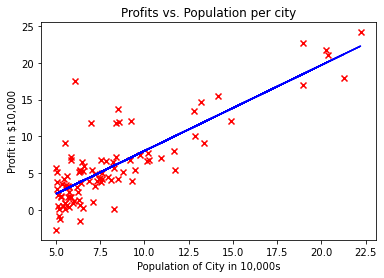

In [25]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Your final values of $w,b$ can also be used to make predictions on profits. Let's predict what the profit would be in areas of 35,000 and 70,000 people. 

- The model takes in population of a city in 10,000s as input. 

- Therefore, 35,000 people can be translated into an input to the model as `np.array([3.5])`

- Similarly, 70,000 people can be translated into an input to the model as `np.array([7.])`


In [26]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


**Expected Output**:
<table>
  <tr>
    <td> <b> For population = 35,000, we predict a profit of<b></td>
    <td> $4519.77 </td> 
  </tr>
  
  <tr>
    <td> <b> For population = 70,000, we predict a profit of<b></td>
    <td> $45342.45 </td> 
  </tr>
</table>

**Congratulations on completing this practice lab on linear regression! Next week, you will create models to solve a different type of problem: classification. See you there!**

<details>
  <summary><font size="2" color="darkgreen"><b>Please click here if you want to experiment with any of the non-graded code.</b></font></summary>
    <p><i><b>Important Note: Please only do this when you've already passed the assignment to avoid problems with the autograder.</b></i>
    <ol>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “Edit Metadata”</li>
        <li> Hit the “Edit Metadata” button next to the code cell which you want to lock/unlock</li>
        <li> Set the attribute value for “editable” to:
            <ul>
                <li> “true” if you want to unlock it </li>
                <li> “false” if you want to lock it </li>
            </ul>
        </li>
        <li> On the notebook’s menu, click “View” > “Cell Toolbar” > “None” </li>
    </ol>
    <p> Here's a short demo of how to do the steps above: 
        <br>
        <img src="https://lh3.google.com/u/0/d/14Xy_Mb17CZVgzVAgq7NCjMVBvSae3xO1" align="center" alt="unlock_cells.gif">
</details>